In [52]:
import scipy.spatial.distance as dist
import pandas as pd
from sklearn.neighbors import DistanceMetric
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [53]:
#a. Load the file, erase the columns "name" and "gender" as they are nominal.
simpsonsOriginal = pd.read_csv('The Simpsons original.csv')
print(simpsonsOriginal)
simpsonsOriginalNoNominal = simpsonsOriginal.drop(['name','gender'], axis=1)

     name  hair length  weight  age gender
0   Homer            0     250   36      M
1   Marge           10     150   34      F
2    Bart            2      90   10      M
3    Lisa            6      78    8      F
4  Maggie            4      20    1      F
5     Abe            1     170   70      M
6   Selma            8     160   41      F
7    Otto           10     180   38      M
8  Krusty            6     200   45      M


In [54]:
#b. Determine the Euclidean distances between the Simpsons.
dist_obj = DistanceMetric.get_metric('euclidean')
qA = dist_obj.pairwise(simpsonsOriginalNoNominal)
print(qA)

[[  0.         100.51865499 162.11107303 174.36742815 232.68218668
   86.93100713  90.49309366  70.73895674  51.15662225]
 [100.51865499   0.          65.11528238  76.65507159 134.25721582
   42.15447782  12.36931688  30.2654919   51.35172831]
 [162.11107303  65.11528238   0.          12.80624847  70.60453243
  100.00499988  76.79192666  94.59386872 115.50324671]
 [174.36742815  76.65507159  12.80624847   0.          58.45511098
  111.0540409   88.41379983 106.39548863 127.48725426]
 [232.68218668 134.25721582  70.60453243  58.45511098   0.
  165.13630733 145.65713165 164.33198106 185.31055016]
 [ 86.93100713  42.15447782 100.00499988 111.0540409  165.13630733
    0.          31.46426545  34.71310992  39.37003937]
 [ 90.49309366  12.36931688  76.79192666  88.41379983 145.65713165
   31.46426545   0.          20.32240143  40.24922359]
 [ 70.73895674  30.2654919   94.59386872 106.39548863 164.33198106
   34.71310992  20.32240143   0.          21.56385865]
 [ 51.15662225  51.35172831 115.

In [55]:
#c. Which Simpsons are closest to each other?
def findClosestEuclidDistance(data):
	dist_obj = DistanceMetric.get_metric('euclidean')
	euclideanDistances = dist_obj.pairwise(data)
	#[0][0] always == 0
	lowestValue = euclideanDistances[0][1]
	for cell in np.nditer(euclideanDistances):
		if cell < lowestValue:
			if cell != 0:
				lowestValue	= cell

	print(lowestValue)

def findFurthestEuclidDistance(data):
	dist_obj = DistanceMetric.get_metric('euclidean')
	euclideanDistances = dist_obj.pairwise(data)
	#[0][0] always == 0
	lowestValue = euclideanDistances[0][1]
	for cell in np.nditer(euclideanDistances):
		print(cell)
		if lowestValue < cell:
			if cell != 0:
				lowestValue	= cell

	print(lowestValue)

findClosestEuclidDistance(simpsonsOriginalNoNominal)

12.36931687685298


In [56]:
#d. What is the Manhattan distance between Homer and Bart?
homer = simpsonsOriginalNoNominal.loc[0]
print(homer)
bart = simpsonsOriginalNoNominal.loc[2]
print(bart)

print ('Manhattan distance between Homer and Bart is: ', dist.cityblock(homer, bart))

hair length      0
weight         250
age             36
Name: 0, dtype: int64
hair length     2
weight         90
age            10
Name: 2, dtype: int64
Manhattan distance between Homer and Bart is:  188


In [57]:
#e. What is the standardized Euclidean distance between Marge and Maggie (do not use the stats.zscore to calculate the z-scores)?

def calculateZScores(data):
	dataZscores = stats.zscore(data)
	return dataZscores

zScores = calculateZScores(simpsonsOriginalNoNominal)
print ('Euclidean distance is', dist.euclidean(zScores[1], zScores[4]))

Euclidean distance is 3.062220247606057


<ipython-input-63-6718c2e16e83>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  distances = linkage(data, method='single')


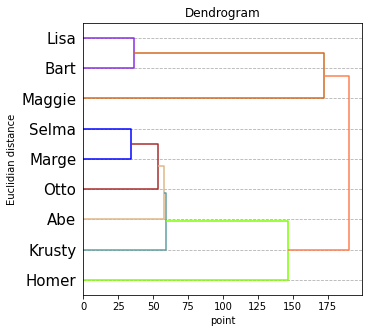

In [63]:
#f. Now create a dendrogram (use Euclidean distances)
def drawDendogram(data):
	from scipy.cluster.hierarchy import linkage, dendrogram
	colors = list(matplotlib.colors.cnames.keys()) # 148
	fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
	distances = linkage(data, method='single')
	ax.set_title("Dendrogram")
	ax.set_xlabel('point')
	ax.set_ylabel('Euclidian distance')
	ax.grid(linestyle='--', axis='y')
	dgram = dendrogram(distances, labels=list(simpsonsOriginal.name), link_color_func=lambda x: colors[x], leaf_font_size=15, ax=ax, orientation='right')
	plt.show()

drawDendogram(dist_obj.pairwise(simpsonsOriginalNoNominal))

In [ ]:
#g. If you should select two clusters from this tree, which are they?  How would you name them?
# The 2 first clusters, these are the adults and the children

In [ ]:
#h. Make a scatterplot of the Simpsons where you put the age in the X-axis and the weight in the Y-axis. Each cluster has another color.

def showScatterplot(data):
	plt.scatter(data['age'], data['weight'])
	plt.show()

showScatterplot(simpsonsOriginalNoNominal)

In [ ]:
#i. Now determine three clusters from the tree and make another plot. Which Simpsons are in which category?
#Cut tree at 55 --> three clusters

In [ ]:
#j. Now try to create two clusters with the k-means algorithm. Look at the centroids. In which coordinates do these centroids differ the most?

def kMeansAlgorithm(data, amountOfClusters):
	kmeansmodel = KMeans(n_clusters=amountOfClusters)
	kmeansmodel.fit(data)
	# print the labels
	print(kmeansmodel.labels_)
	# plot the points and the cluster
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.grid(linestyle='--')
	ax.set_title('K-Means')
	# put unique labels in labels and retrieve the list of markers
	labels = set(kmeansmodel.labels_)
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	# plot all points in a different color and marker
	for m, l in zip(markers, labels):
			indices = np.where(kmeansmodel.labels_ == l)[0] # is a tuple => [0]
			ax.scatter(data.loc[indices, 'age'], data.loc[indices, 'weight'],marker=m, s=50)
	# plot the cluster center in the middle of the clusterplot
	ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],marker= "o" , c='black', s=100)
	plt.show()

kMeansAlgorithm(simpsonsOriginalNoNominal, 2)

# centroids (can deviate): (5.8, 185,44) and (4,62.7,6.3). The centroids differ the most in weight and age

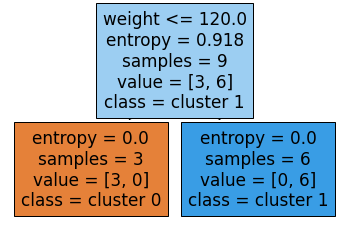

In [64]:
#k. Can you create a decision tree that determines in which cluster a Simpson falls? Create a column with the cluster number and use DecisionTreeClassifier to set up the tree.

def showDecisionTree(data, amountOfClusters):
	kmeansmodel = KMeans(n_clusters=amountOfClusters)
	kmeansmodel.fit(data)
	classifier = DecisionTreeClassifier(criterion='entropy')
	classifier.fit(data, kmeansmodel.labels_)
	tree.plot_tree(classifier, feature_names=['age', 'weight'], class_names=['cluster {}'.format(i) for i in np.unique(kmeansmodel.labels_)],filled=True)
	plt.show()

showDecisionTree(simpsonsOriginalNoNominal, 2)